Inputs

In [38]:

import matplotlib.pyplot as plt
import numpy as np

# Wire Dimensions
wire_gauges = np.arange(5, 30, 1)
wire_length = [1]

#Wire Properties
material_names = ['Copper']
material_densities = [8960]
material_resistivities = [1.68e-8]

#Power Properties
average_current = [1, 2, 3, 4, 5, 6]
mplt_current = 10
power_loss_per_kg = 2.5

#AWS Gauge to Area dictionary (mm²) (https://www.sab-cable.com/cables-wires-harnessing-temperature-measurement/technical-data/cables-and-wires/american-cable-stranding.html)
gauge_to_area = {
    30 : 0.0503,
    29 : 0.0646,
    28 : 0.0804,
    27 : 0.1020,
    26 : 0.1280,
    25 : 0.1630,
    24 : 0.2050,
    23 : 0.2590,
    22 : 0.3240,
    21 : 0.4120,
    20 : 0.5190,
    19 : 0.6530,
    18 : 0.8230,
    17 : 1.04,
    16 : 1.31,
    15 : 1.65,
    14 : 2.08,
    13 : 2.63,
    12 : 3.31,
    11 : 4.15,
    10 : 5.26,
    9 : 6.62,
    8 : 8.34,
    7 : 10.6,
    6 : 13.3,
    5 : 16.8
}


resistivity (p) = Resistance (R) * Cross Sectional Area (A) / Length (L)

R = pL/A 

Power Loss From Resistance = I² * R = I² * (pL/A)

Mass (m) = density (d) * A * L

Power Loss From Mass = m * 2.5 W/kg (Constant found from previous project)

Total Power Loss = I²pL/A

C:\Users\XPS\AppData\Local\Temp\ipykernel_35852\2303776974.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0)


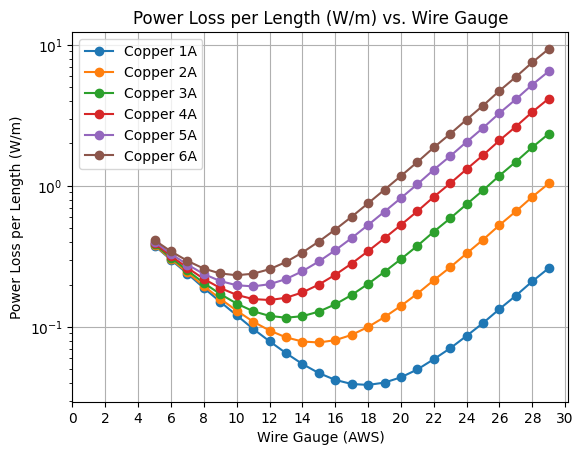

In [ ]:

for i in range(len(material_names)):
    total_power_losses = []
    power_losses_resistance = []
    power_losses_mass = []

    mat_resistivity = material_resistivities[i]
    mat_density = material_densities[i]
    mat_name = material_names[i]

    for current in average_current:
        total_power_losses = []

        for gauge in wire_gauges:
            cross_sectional_area = gauge_to_area[gauge] * 1e-6 # Converts mm² to m²

            power_loss_resistance = current * current * mat_resistivity / cross_sectional_area # P = I² * (pL/A)
            power_loss_mass = mat_density * cross_sectional_area * power_loss_per_kg #

            #power_losses_resistance.append(power_loss_resistance)
            #power_losses_mass.append(power_loss_mass)
            total_power_losses.append(power_loss_mass + power_loss_resistance)

        plt.plot(wire_gauges, total_power_losses,  marker='o', label = mat_name + " " + str(current) + "A")
        
    
    
    #plt.plot(wire_gauges, power_losses_mass,  marker='x')
    #plt.plot(wire_gauges, power_losses_resistance,  marker='s')


plt.title('Power Loss per Length (W/m) vs. Wire Gauge')

plt.ylabel("Power Loss per Length (W/m)")
plt.xlabel("Wire Gauge (AWS)")
plt.legend()

plt.yscale('log')

plt.xlim(0)
plt.ylim(0)

plt.xticks(np.arange(0, 31, 2))
plt.grid()

plt.show()


    